# Data Loading

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
import joblib  # For saving the model

In [78]:
# Loading the datasets
train_df = pd.read_csv('train.csv')
print("Train Data Info:")
#print(train_df.info())
train_df

Train Data Info:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [79]:
test_df = pd.read_csv('test.csv')
print("\nTest Data Info:")
#print(test_df.info())
test_df


Test Data Info:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [80]:
print("\nMissing Values in Train Data:") #checking the missing value of train dataset
print(train_df.isnull().sum())


Missing Values in Train Data:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [81]:
print("\nMissing Values in Test Data:") #checking the missing value of test dataset
print(test_df.isnull().sum())


Missing Values in Test Data:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


# Exploratory Data Analysis (EDA)

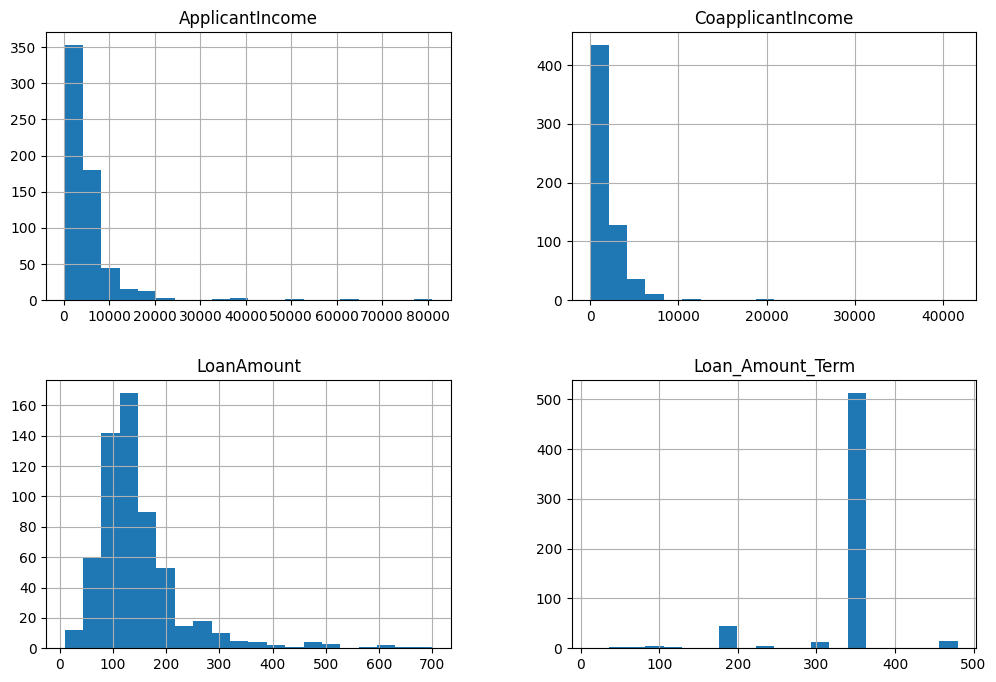

In [82]:
# Creating a Numerical features distribution
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train_df[num_cols].hist(bins=20, figsize=(12, 8))
plt.show()

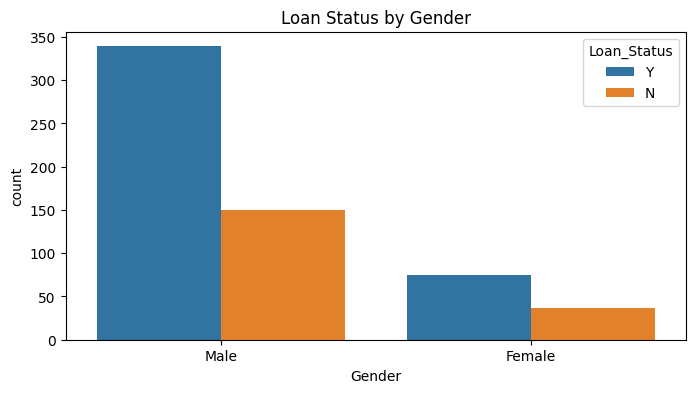

In [83]:
# Creating a Categorical features distribution
cat_cols = ['Gender']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, hue='Loan_Status')
    plt.title(f"Loan Status by {col}")
    plt.show()

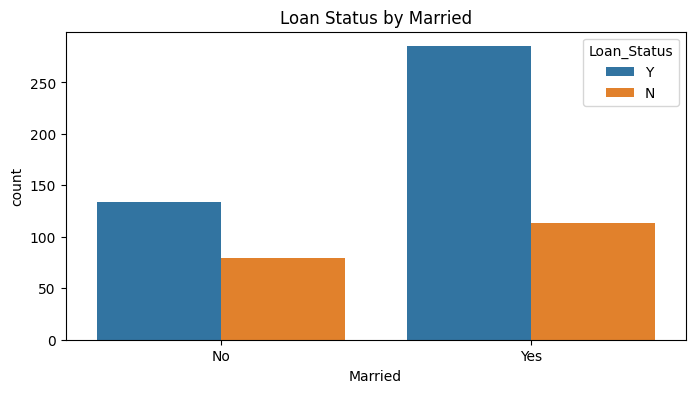

In [84]:
cat_cols = ['Married']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, hue='Loan_Status')
    plt.title(f"Loan Status by {col}")
    plt.show()

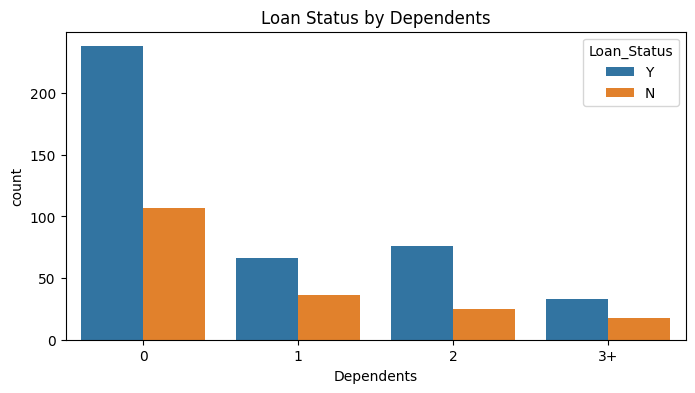

In [85]:
cat_cols = ['Dependents']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, hue='Loan_Status')
    plt.title(f"Loan Status by {col}")
    plt.show()

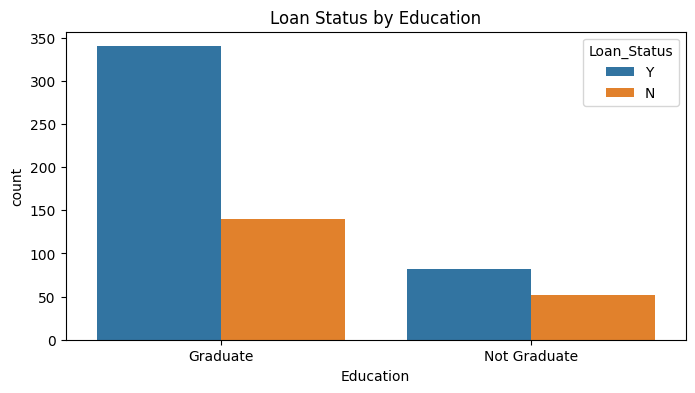

In [86]:
cat_cols = ['Education']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, hue='Loan_Status')
    plt.title(f"Loan Status by {col}")
    plt.show()

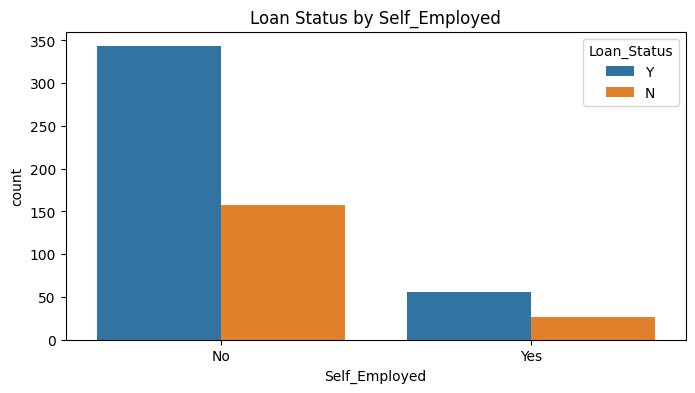

In [87]:
cat_cols = ['Self_Employed']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, hue='Loan_Status')
    plt.title(f"Loan Status by {col}")
    plt.show()

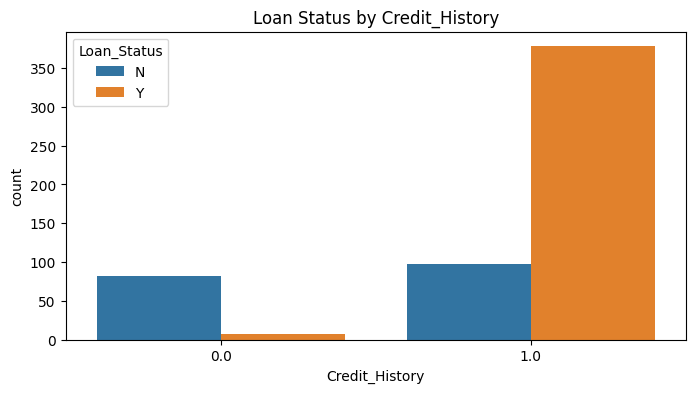

In [88]:
cat_cols = ['Credit_History']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, hue='Loan_Status')
    plt.title(f"Loan Status by {col}")
    plt.show()

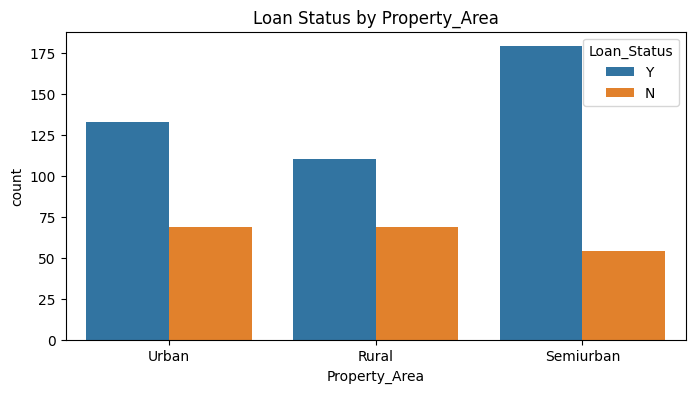

In [89]:
cat_cols = ['Property_Area']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, hue='Loan_Status')
    plt.title(f"Loan Status by {col}")
    plt.show()

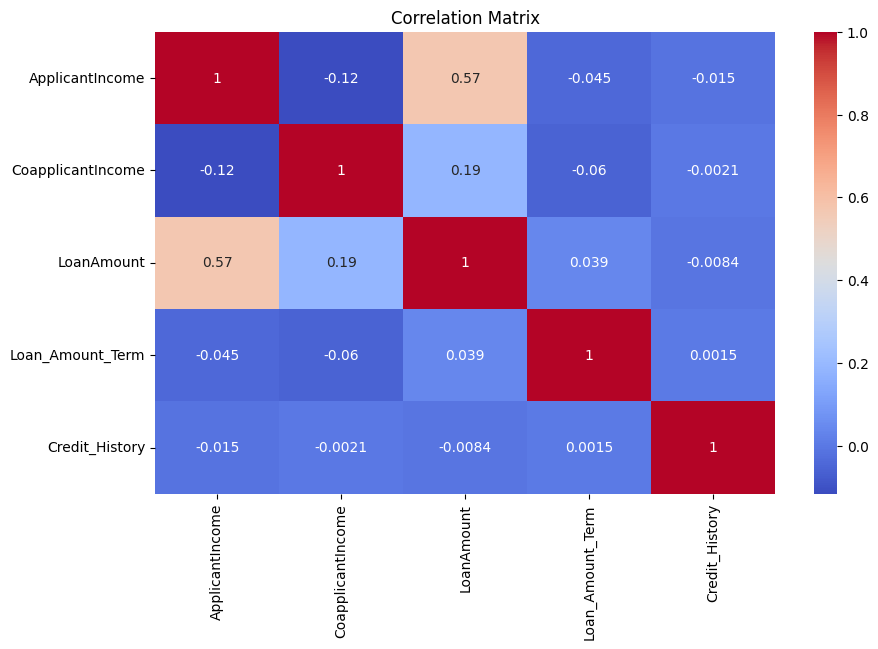

In [90]:
# Creating a Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering & Preprocessing

# Creating a New Feature:

In [91]:
def feature_engineering(df):
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['LoanAmountPerMonth'] = df['LoanAmount'] / df['Loan_Amount_Term']
    df['HasCoapplicant'] = (df['CoapplicantIncome'] > 0).astype(int)
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)
    return df

In [92]:
train_df = feature_engineering(train_df)
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmountPerMonth,HasCoapplicant
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN,0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556,1
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333,0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,0.197222,0
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,0.222222,0
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,0.702778,1
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,0.519444,0


In [93]:
test_df = feature_engineering(test_df)
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmountPerMonth,HasCoapplicant
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,0.305556,0
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,0.350000,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,0.577778,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4886,0.277778,1
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,0.216667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,5786,0.313889,1
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4867,0.319444,1
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,5243,0.350000,1
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7393,0.438889,1


# Handling Missing values:

In [94]:
def impute_missing(df):
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Married'].fillna(df['Married'].mode()[0], inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
    return df

In [95]:
train_df = impute_missing(train_df)
train_df

/var/folders/60/30jt49l93hv814nztk5pbnx00000gn/T/ipykernel_53195/910705837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/var/folders/60/30jt49l93hv814nztk5pbnx00000gn/T/ipykernel_53195/910705837.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmountPerMonth,HasCoapplicant
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,NaN,0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556,1
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333,0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,0.197222,0
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,0.222222,0
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,0.702778,1
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,0.519444,0


In [96]:
test_df = impute_missing(test_df)
test_df

/var/folders/60/30jt49l93hv814nztk5pbnx00000gn/T/ipykernel_53195/910705837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/var/folders/60/30jt49l93hv814nztk5pbnx00000gn/T/ipykernel_53195/910705837.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmountPerMonth,HasCoapplicant
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,0.305556,0
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,0.350000,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,0.577778,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,0.277778,1
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,0.216667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,5786,0.313889,1
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4867,0.319444,1
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,5243,0.350000,1
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7393,0.438889,1


# Encoding Categorical Variables

In [97]:
# Define preprocessing pipeline
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 'LoanAmountPerMonth']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

(numeric_transformer)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [98]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [99]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Model Training & Hyperparameter Tuning:

In [100]:
# Train-Test Split:
X = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_df['Loan_Status'].map({'Y': 1, 'N': 0})  # Converting to binary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [101]:
# Defining models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [102]:
# Hyperparameter grid
param_grids = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l2']},
    'Random Forest': {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [5, 10, None]},
    'Gradient Boosting': {'classifier__n_estimators': [100, 200], 'classifier__learning_rate': [0.01, 0.1]}
}

In [103]:
# Evaluating models
best_models = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best parameters for Random Forest: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 100}


In [104]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

ROC-AUC Score: 0.7835913312693499
F1 Score: 0.9081081081081082

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123

ROC-AUC Score: 0.7704334365325077
F1 Score: 0.9032258064516129

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1     

# Pipeline Deployment

In [105]:
from sklearn.metrics import f1_score

# Selecting the best model based on F1 score
best_model_name = None
best_score = 0
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_model_name = name
        best_model = model

print(f"Best model: {best_model_name} with F1 Score: {best_score:.4f}")


Best model: Logistic Regression with F1 Score: 0.9081


In [106]:
joblib.dump(best_model, "loan_prediction_pipeline.pkl") # Saving the pipeline


['loan_prediction_pipeline.pkl']

In [107]:
sample_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '1',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 6000,
    'CoapplicantIncome': 1500,
    'LoanAmount': 120,
    'Loan_Amount_Term': 360,
    'Credit_History': 1.0,
    'Property_Area': 'Urban',
    'TotalIncome': 7500,
    'LoanAmountPerMonth': 120/360
}
sample_df = pd.DataFrame([sample_data])

prediction = best_model.predict(sample_df) #Predicting with the new data
print(f"Loan Status: {'Approved' if prediction[0] == 1 else 'Rejected'}")


Loan Status: Approved


In [108]:
# Defining multiple stress test cases 
stress_cases = [
    {
        'Gender': 'Male',
        'Married': 'Yes',
        'Dependents': '0',
        'Education': 'Graduate',
        'Self_Employed': 'No',
        'ApplicantIncome': 10000,
        'CoapplicantIncome': 5000,
        'LoanAmount': 120,
        'Loan_Amount_Term': 360,
        'Credit_History': 1.0,
        'Property_Area': 'Urban'
    },
    {
        'Gender': 'Female',
        'Married': 'No',
        'Dependents': '3+',
        'Education': 'Not Graduate',
        'Self_Employed': 'Yes',
        'ApplicantIncome': 3000,
        'CoapplicantIncome': 0,
        'LoanAmount': 200,
        'Loan_Amount_Term': 360,
        'Credit_History': 0.0,
        'Property_Area': 'Rural'
    },
    {
        'Gender': 'Male',
        'Married': 'Yes',
        'Dependents': '2',
        'Education': 'Graduate',
        'Self_Employed': 'No',
        'ApplicantIncome': 8000,
        'CoapplicantIncome': 2000,
        'LoanAmount': 180,
        'Loan_Amount_Term': 360,
        'Credit_History': 1.0,
        'Property_Area': 'Semiurban'
    },
    {
        'Gender': 'Female',
        'Married': 'Yes',
        'Dependents': '1',
        'Education': 'Graduate',
        'Self_Employed': 'Yes',
        'ApplicantIncome': 4500,
        'CoapplicantIncome': 1500,
        'LoanAmount': 100,
        'Loan_Amount_Term': 120,
        'Credit_History': 1.0,
        'Property_Area': 'Urban'
    }
]

# using DataFrame and engineer features
stress_df = pd.DataFrame(stress_cases)
stress_df['TotalIncome'] = stress_df['ApplicantIncome'] + stress_df['CoapplicantIncome']
stress_df['LoanAmountPerMonth'] = stress_df['LoanAmount'] / stress_df['Loan_Amount_Term']

predictions = best_model.predict(stress_df) # Prediction using the best model

In [109]:
for i, result in enumerate(predictions):
    status = "Approved" if result == 1 else "Rejected"
    print(f"Scenario {i+1}: {status}")


Scenario 1: Approved
Scenario 2: Rejected
Scenario 3: Approved
Scenario 4: Approved


In [110]:
# Predicting by test data
y_pred = best_model.predict(X_test)

# using Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print("====== Final Model Evaluation ======")
print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC AUC Score  : {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


====== Final Model Evaluation ======
Accuracy       : 0.8618
Precision      : 0.8400
Recall         : 0.9882
F1 Score       : 0.9081
ROC AUC Score  : 0.7836

Confusion Matrix:
[[22 16]
 [ 1 84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

